<a href="https://colab.research.google.com/github/meenal-patel/TSFtask/blob/main/Task_1_(TSF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1 - Prediction using supervised ML**

To predict the percentage of Marks of the student based on the no. of hours they studied

**Author - Meenal Patel**

In [ ]:
# Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
#Reading the data
data= pd.read_csv('https://bit.ly/w-data')
data.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [ ]:
#Check if there is any null value in Dataset
data.isnull==True

False

**There is no null value in the Dataset so, we can now visualize our Data.**

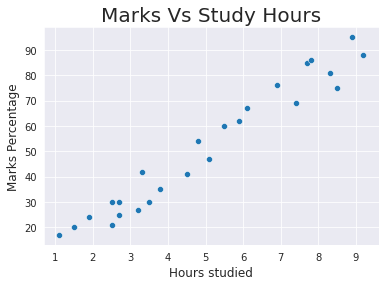

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'],x= data['Hours'])
plt.title('Marks Vs Study Hours', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours studied', size=12)
plt.show()

**From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied', Lets plot a regression line to confirm the correlation.**

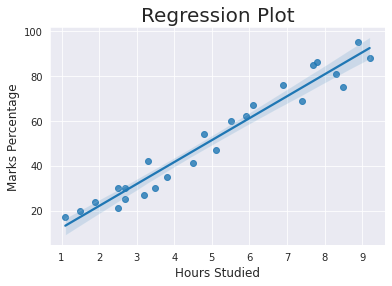

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x=data['Hours'], y=data['Scores'])
plt.title('Regression Plot', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

**It is confirmed that the variables are positively correlated.**

**Training the Model**

**1) Splitting the Data**

In [ ]:
#Defining X and Y from the Data
X = data.iloc[:, :-1].values
Y = data.iloc[:,1].values

In [ ]:
#Spliting the Data in two
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=0)


**2) Fitting the Data into Model**

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("-------Model Trained-------")


-------Model Trained-------


**Predicting the percentage of Marks**

In [ ]:
pred_Y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours':[i[0] for i in val_X], 'Predicted Marks': [k for k in pred_Y]})
prediction


,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Comparing the Predicted Marks with the Actual Marks**

In [ ]:
compare_score = pd.DataFrame({'Actual Marks': val_Y, 'Predicted Marks': pred_Y})
compare_score

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Visually Comparing the Predicted Marks with the Actual Marks**

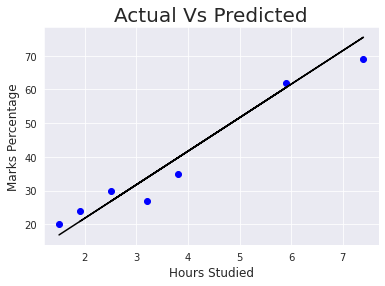

In [ ]:
plt.scatter(x=val_X,y=val_Y, color='blue')
plt.plot(val_X, pred_Y, color='black')
plt.title('Actual Vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Evaluating the Model**

In [ ]:
#Calculating the accuracy of model
print('Mean Absolute Error:', mean_absolute_error(val_Y, pred_Y))


Mean Absolute Error: 4.130879918502482


*Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.*

**Question - What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:
#Predicted Score if the Student studied for 9.25 hours per day.
hours= [9.25]
answer = regression.predict([hours])
print("Score= []",(round(answer[0],3)))


Score= [] 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**